# Dataset Play Tennis

In [79]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn import tree
from sklearn.tree import export_text

import six
import sys
import graphviz
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from sklearn.tree import export_graphviz

from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

### Constant

In [80]:
RANDOM_STATE = 1

### Read Data

In [81]:
df = pd.read_csv('PlayTennis.csv')
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Get Attribute and Class Name

In [82]:
col_name = df.columns.tolist()
feat_name = col_name[:-1]
class_name = col_name[-1]
print(feat_name)
print(class_name)

['Outlook', 'Temperature', 'Humidity', 'Wind']
Play Tennis


### Label Encoding

In [83]:
le = LabelEncoder()
df = df.apply(le.fit_transform)
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


### Split Train and Test Data

In [84]:
X = df[feat_name]
y = df[[class_name]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [85]:
X_train

,Outlook,Temperature,Humidity,Wind
2,0,1,0,1
10,2,2,1,0
4,1,0,1,1
1,2,1,0,0
12,0,1,1,1
0,2,1,0,1
13,1,2,0,0
9,1,2,1,1
8,2,0,1,1
11,0,2,0,0


In [86]:
y_train

,Play Tennis
2,1
10,1
4,1
1,0
12,1
0,0
13,0
9,1
8,1
11,1


In [87]:
X_test

,Outlook,Temperature,Humidity,Wind
3,1,2,0,1
7,2,2,0,1
6,0,0,1,0


In [88]:
y_test

,Play Tennis
3,1
7,0
6,1


## DecisionTreeClassifier

In [89]:
clf = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Visualize Tree

In [90]:
# Export tree
r = export_text(clf, feature_names=feat_name)
print(r)

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



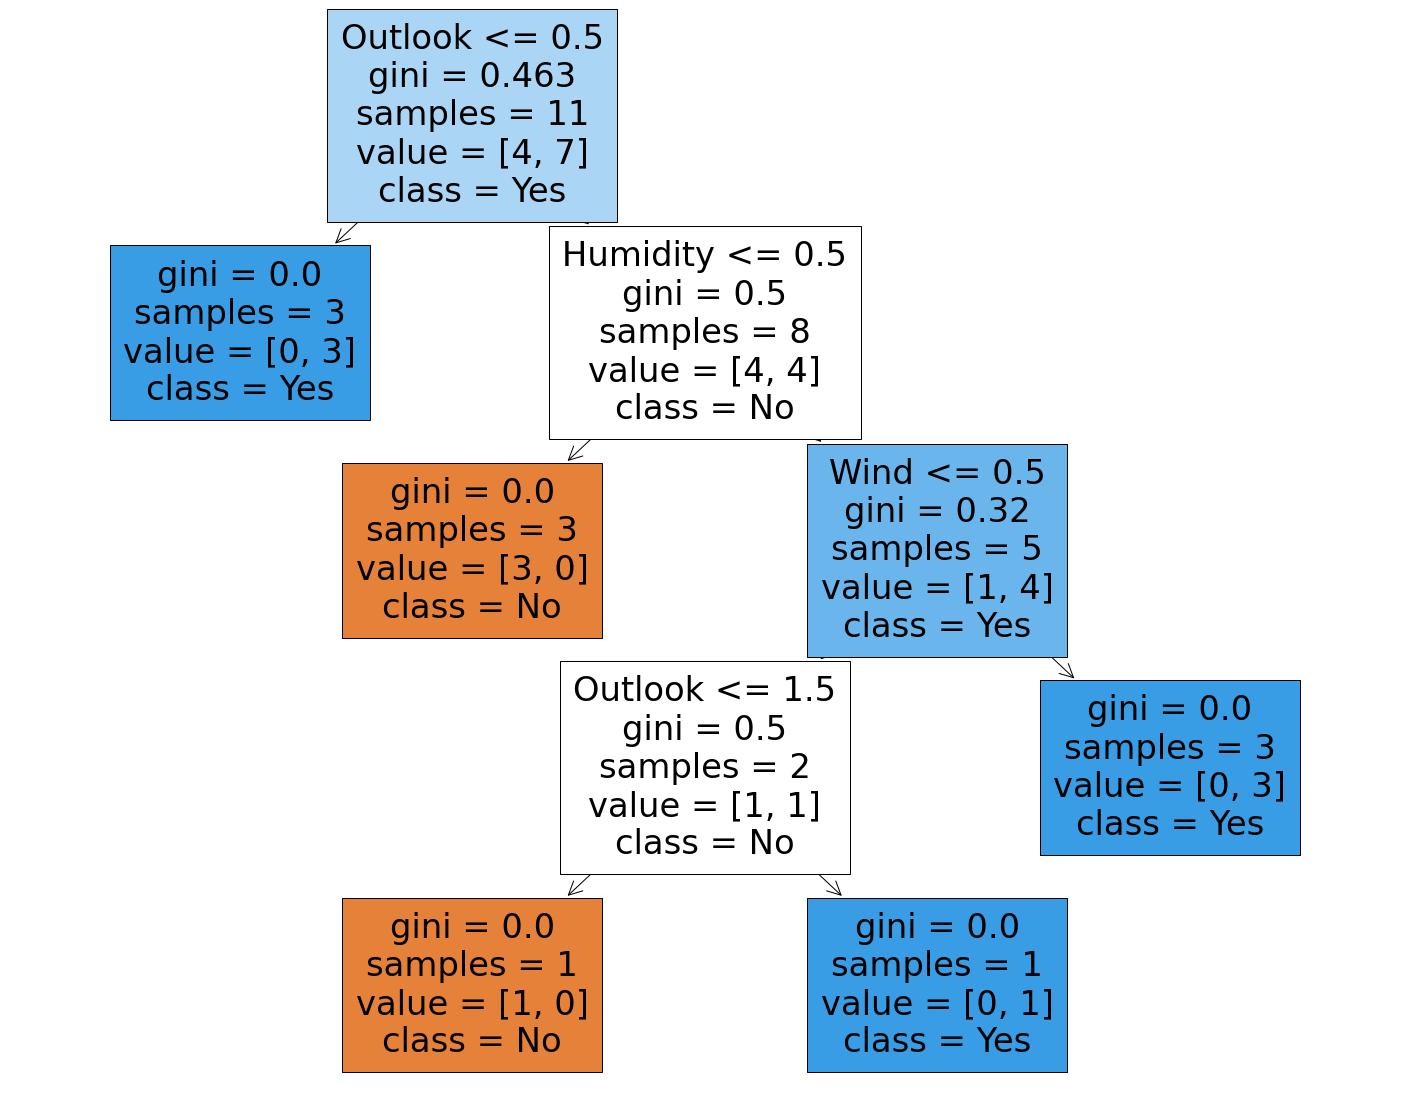

In [91]:
# Visualize tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feat_name,  
                   class_names=["No", "Yes"],
                   filled=True)

### Accuracy & F1 Score

In [92]:
pred_dtl = clf.predict(X_test)
acc_dtl = accuracy_score(y_test, pred_dtl)
f1_dtl = f1_score(y_test, pred_dtl)
print("DecisionTreeClassifier")
print("Accuracy: ", acc_dtl)
print("f1_score: ", f1_dtl)

DecisionTreeClassifier
Accuracy:  0.6666666666666666
f1_score:  0.6666666666666666


## Id3Estimator

In [93]:
id3 = Id3Estimator()
id3 = id3.fit(X_train, y_train)

### Visualize Tree

In [97]:
dot_data = tree.export_graphviz(id3.tree_, out_file=None,
                               feature_names=feat_name,
                               class_names=["No", "Yes"],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

TypeError: <id3.tree.Tree object at 0x141468ac0> is not an estimator instance.

### Accuracy & F1 Score

In [94]:
pred_id3 = id3.predict(X_test)
acc_id3 = accuracy_score(y_test, pred_id3)
f1_id3 = f1_score(y_test, pred_id3)
print("Id3Estimator")
print("Accuracy: ", acc_id3)
print("f1_score: ", f1_id3)

Id3Estimator
Accuracy:  0.6666666666666666
f1_score:  0.6666666666666666


## KMeans

In [95]:
kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE)
kmeans_train = kmeans.fit(X_train, y_train)

### Visualize Clusters

In [96]:
output = plt.scatter(X_train[:,0], X_train[:,1], s = 100, c = kmeans.labels_, marker = 'o', alpha = 1, )
centers = kmeans_train.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

### Accuracy & F1

In [98]:
pred_kmeans = kmeans.predict(X_test)
pred_kmeans = [0 if label!=1 else 1 for label in pred_kmeans]
acc_kmeans = accuracy_score(y_test, pred_kmeans)
f1_kmeans = f1_score(y_test, pred_kmeans)
print("KMeans")
print("Accuracy: ", acc_kmeans)
print("f1_score: ", f1_kmeans)

KMeans
Accuracy:  0.6666666666666666
f1_score:  0.6666666666666666


## LogisticRegression

In [99]:
log = LogisticRegression(random_state=RANDOM_STATE, max_iter=100)
log.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Show Coefficients

In [100]:
log.coef_

array([[-0.6364867 ,  0.29289308,  0.78462682,  0.69810077]])

### Accuracy & F1

In [101]:
pred_log = log.predict(X_test)
acc_log = accuracy_score(y_test, pred_log)
f1_log = f1_score(y_test, pred_log)
print("LogisticRegression")
print("Accuracy: ", acc_log)
print("f1_score: ", f1_log)

LogisticRegression
Accuracy:  0.6666666666666666
f1_score:  0.8


## Neural Network

In [102]:
# MLPClassifier
mlp = MLPClassifier(random_state=RANDOM_STATE, max_iter=300)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

### Show Coefficients

In [103]:
mlp.coefs_

[array([[-2.01669544e-03,  2.52702012e-01, -2.79707027e-01,
         -9.48064481e-02, -2.31377959e-01, -3.61082260e-01,
         -4.44193714e-03, -7.72281157e-02, -3.49068090e-02,
          1.49294967e-01,  1.25741193e-08,  1.28161442e-01,
         -4.12696786e-02,  3.79593168e-01, -2.74252389e-01,
         -8.55969570e-02, -2.22984282e-01,  1.64727351e-01,
         -2.24160065e-01, -1.88756194e-01,  3.34568878e-03,
          2.23659935e-01, -6.97992204e-06,  1.87727201e-01,
          3.46120337e-02,  3.33531797e-01, -1.94774150e-02,
         -1.91921488e-01, -6.10055402e-03,  3.46957492e-01,
         -3.65061797e-01,  6.14537481e-02,  8.06981018e-02,
          2.24640563e-09, -5.92497570e-02, -4.70800830e-06,
          2.44783813e-02,  8.12992800e-02, -1.93506374e-02,
          2.69935593e-01, -2.22235437e-02,  8.40336139e-02,
         -1.58218757e-01,  2.69609310e-01, -1.69879608e-01,
         -1.13581180e-01,  7.51367693e-02,  1.47007541e-02,
         -5.13233051e-02, -1.13965021e-0

### Accuracy & F1

In [104]:
pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, pred_mlp)
f1_mlp = f1_score(y_test, pred_mlp)
print("MLPClassifier")
print("Accuracy: ", acc_mlp)
print("f1_score: ", f1_mlp)

MLPClassifier
Accuracy:  1.0
f1_score:  1.0


### SVM

In [105]:
svm = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma='auto'))
svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear'))])

### Show Coefficients

In [106]:
svm.steps[1][1].coef_

array([[-0.79252711,  0.78817254,  1.25449077,  0.75382527]])

### Accuracy & F1

In [107]:
pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, pred_svm)
f1_svm = f1_score(y_test, pred_svm)
print("SVM")
print("Accuracy: ", acc_svm)
print("f1_score: ", f1_svm)

SVM
Accuracy:  1.0
f1_score:  1.0


## Performance Summary

In [108]:
algo = ['DecisionTreeClassifier', 'Id3Estimator', 'K Means', 'LogisticRegression', 'Neural_network', 'SVM']
acc = [acc_dtl, acc_id3, acc_kmeans, acc_log, acc_mlp, acc_svm]
f1 = [f1_dtl, f1_id3, f1_kmeans, f1_log, f1_mlp, f1_svm]
perf = {'Accuracy': acc, 'F1': f1}

perf_tab = pd.DataFrame(data=perf, index=algo)
perf_tab

,Accuracy,F1
DecisionTreeClassifier,0.666667,0.666667
Id3Estimator,0.666667,0.666667
K Means,0.666667,0.666667
LogisticRegression,0.666667,0.800000
Neural_network,1.000000,1.000000
SVM,1.000000,1.000000


<p>Berdasarkan performa keenam model diatas, didapatkan model dengan performa terbaik berdasarkan skor akurasi dan F1 adalah neural network (MLP Classifier) dan SVM.</p>